## <center> Logistic Regression </center>

#### The Data
Creating a logistic regression model to estimate the college admissions. There are two entrance examination for each candidate. You can using their transcript in the past as a logistic regression training set. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
pdData = pd.read_csv(
    'LogiReg_data.txt', header=None, names=['Exam 1', 'Exam 2', 'Admitted'])
pdData.head()

,Exam 1,Exam 2,Admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [2]:
pdData.info()
# There are 100 candidates, each of them took 2 examinations

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
Exam 1      100 non-null float64
Exam 2      100 non-null float64
Admitted    100 non-null int64
dtypes: float64(2), int64(1)
memory usage: 2.4 KB


Text(0,0.5,'Exam 2 Score')

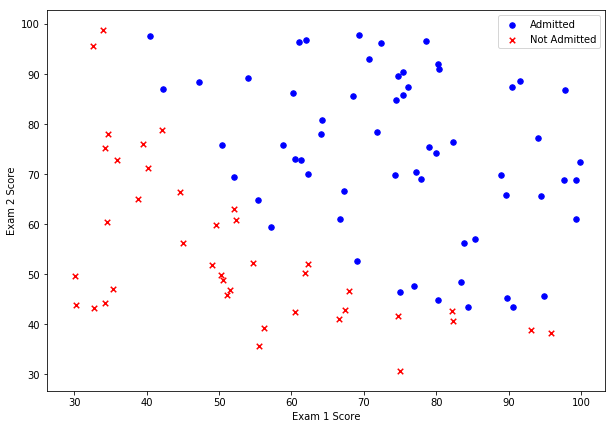

In [3]:
positive = pdData[pdData['Admitted'] == 1] # the set of *positive* examples
negative = pdData[pdData['Admitted'] == 0] # the set of *negative* examples
fig, ax = plt.subplots(figsize=(10,7))
ax.scatter(positive['Exam 1'], positive['Exam 2'], s=30, c='b', marker='o', label='Admitted')
ax.scatter(negative['Exam 1'], negative['Exam 2'], s=30, c='r', marker='x', label='Not Admitted')
ax.legend()
ax.set_xlabel('Exam 1 Score')
ax.set_ylabel('Exam 2 Score')

#### The logistic regression
Target: Create a classifier (three parameters: $\theta_0 \theta_1 \theta_2 $) <br/>
Estimate the admitted results according to a certain threshold. <br/>
$\theta_0 $: error <br/>
$\theta_1 $: Exam 1 <br/>
$\theta_2 $: Exam 2 <br/><br/>

##### Models need to be finished:
-  `sigmoid` : transform to the probability
-  `model` : return the esitmate values
-  `cost` : error
-  `gradient` : gradient direction
-  `descent` : gradient descent to update the parameters
-  `accuracy`

### Sigmoid
$${\displaystyle G(x)={\frac {1}{1+e^{-x}}}={\frac {e^{x}}{e^{x}+1}}.}$$
* $g:\mathbb{R} \to [0,1]$
* $g(0)=0.5$
* $g(- \infty)=0$
* $g(+ \infty)=1$

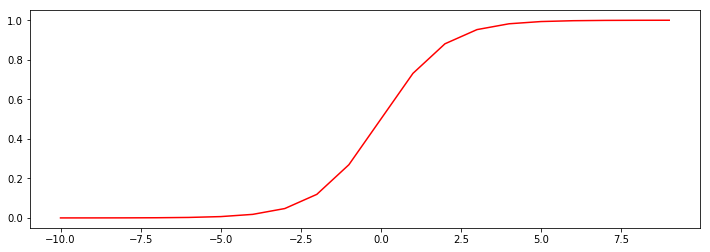

In [4]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))


#creates a vector containing 20 equally spaced values from -10 to 10
nums = np.arange(-10, 10, step=1)
fig, ax = plt.subplots(figsize=(12, 4))
ax.plot(nums, sigmoid(nums), 'r')

#### linear regression model:
$$
\begin{array}{ccc}
\begin{pmatrix}\theta_{0} & \theta_{1} & \theta_{2}\end{pmatrix} & \times & \begin{pmatrix}1\\
x_{1}\\
x_{2}
\end{pmatrix}\end{array}=\theta_{0}+\theta_{1}x_{1}+\theta_{2}x_{2}
$$

In [5]:
# Estimation function
def model(X, theta):
    return sigmoid(np.dot(X, theta.T))

In [6]:
# insert a '1' column，return an error theta_{0}
# in a try / except structure so as not to return an error
# if the block si executed several times
pdData.insert(0, 'Ones', 1)

# set X (training data) and y (target variable)
# Y = theta_1 Exam 1 + theta_2 Exam 2 + theta_0
origin_data = pdData.as_matrix()
cols = origin_data.shape[1]
X = origin_data[:, 0:cols - 1]
Y = origin_data[:, cols - 1:cols]
theta = np.zeros([1, 3])

In [7]:
X[:5]

array([[ 1.        , 34.62365962, 78.02469282],
       [ 1.        , 30.28671077, 43.89499752],
       [ 1.        , 35.84740877, 72.90219803],
       [ 1.        , 60.18259939, 86.3085521 ],
       [ 1.        , 79.03273605, 75.34437644]])

In [8]:
Y[:5]

array([[0.],
       [0.],
       [0.],
       [1.],
       [1.]])

In [9]:
X.shape, Y.shape,theta.shape

((100, 3), (100, 1), (1, 3))

###  Loss function
minimize the Logarithm likelihood function:

$$
D(h_\theta(x), y) = -y\log(h_\theta(x)) - (1-y)\log(1-h_\theta(x))
$$
average cost:
$$
J(\theta)=\frac{1}{n}\sum_{i=1}^{n} D(h_\theta(x_i), y_i)
$$

In [10]:
def cost(X, y, theta):
    left = np.multiply(-y, np.log(model(X, theta)))
    right = np.multiply(1 - y, np.log(1 - model(X, theta)))
    return np.sum(left - right) / (len(X))

In [11]:
cost(X, Y, theta)

0.6931471805599453

### Gradient

$$
\frac{\partial J}{\partial \theta_j}=-\frac{1}{m}\sum_{i=1}^n (y_i - h_\theta (x_i))x_{ij}
$$

In [12]:
def gradient(X, Y, theta):
    grad = np.zeros(theta.shape)
    error = (model(X, theta) - Y).ravel()
    for j in range(len(theta.ravel())):  #for each parmeter
        term = np.multiply(error, X[:, j])
        grad[0, j] = np.sum(term) / len(X)

    return grad

### Gradient descent

In [13]:
STOP_ITER = 0 # stop after certain time of iteration
STOP_COST = 1 # stop after certain small cost
STOP_GRAD = 2 # stop after certain similar gradient

def stopCriterion(type, value, threshold):
    if type == STOP_ITER: return value > threshold
    elif type == STOP_COST: return abs(value[-1] - value[-2]) < threshold
    elif type == STOP_GRAD: return np.linalg.norm(value) < threshold

In [14]:
import numpy.random

def shuffleData(data):
    np.random.shuffle(data)
    cols = data.shape[1]
    X = data[:, 0:cols-1]
    y = data[:, cols-1:]
    return X, y

In [15]:
import time


def descent(data, theta, batchSize, stopType, thresh, alpha):
    # calculate the Gradient descent

    init_time = time.time()
    i = 0  # interation times
    k = 0  # batch
    X, y = shuffleData(data)
    grad = np.zeros(theta.shape)  # gradient
    costs = [cost(X, y, theta)]  # cost

    while True:
        grad = gradient(X[k:k + batchSize], y[k:k + batchSize], theta)
        k += batchSize  #取batch数量个数据
        if k >= n:
            k = 0
            X, y = shuffleData(data)  #重新洗牌
        theta = theta - alpha * grad  # 参数更新
        costs.append(cost(X, y, theta))  # 计算新的损失
        i += 1

        if stopType == STOP_ITER: value = i
        elif stopType == STOP_COST: value = costs
        elif stopType == STOP_GRAD: value = grad
        if stopCriterion(stopType, value, thresh): break

    return theta, i - 1, costs, grad, time.time() - init_time

In [16]:
# graphic
def runExpe(data, theta, batchSize, stopType, thresh, alpha):
    #import pdb; pdb.set_trace();
    theta, iter, costs, grad, dur = descent(data, theta, batchSize, stopType, thresh, alpha)
    name = "Original" if (data[:,1]>2).sum() > 1 else "Scaled"
    
    name += " data - learning rate: {} - ".format(alpha)
    if batchSize==n: strDescType = "Gradient"
    elif batchSize==1:  strDescType = "Stochastic"
    else: strDescType = "Mini-batch ({})".format(batchSize)
    
    name += strDescType + " descent - Stop: "
    if stopType == STOP_ITER: strStop = "{} iterations".format(thresh)
    elif stopType == STOP_COST: strStop = "costs change < {}".format(thresh)
    else: strStop = "gradient norm < {}".format(thresh)
    
    name += strStop
    print ("***{}\nTheta: {} - Iter: {} - Last cost: {:03.2f} - Duration: {:03.2f}s".format(
        name, theta, iter, costs[-1], dur))
    fig, ax = plt.subplots(figsize=(12,4))
    ax.plot(np.arange(len(costs)), costs, 'r')
    ax.set_xlabel('Iterations')
    ax.set_ylabel('Cost')
    ax.set_title(name.upper() + ' - Error vs. Iteration')
    return theta

### compare three different stop strategies

***Original data - learning rate: 1e-06 - Gradient descent - Stop: 5000 iterations
Theta: [[-0.00027127  0.00705232  0.00376711]] - Iter: 5000 - Last cost: 0.63 - Duration: 0.91s


array([[-0.00027127,  0.00705232,  0.00376711]])

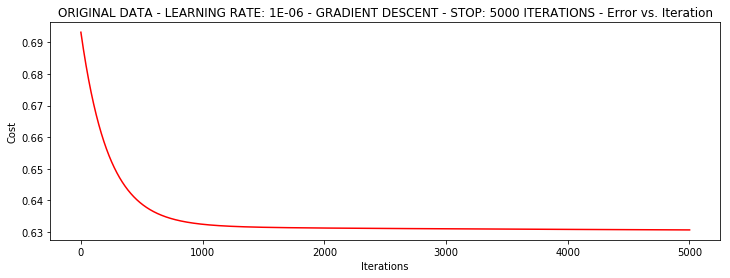

In [17]:
# Stop after certain interation times: according to the sample size
n=100
runExpe(origin_data, theta, n, STOP_ITER, thresh=5000, alpha=0.000001)

***Original data - learning rate: 0.001 - Gradient descent - Stop: costs change < 1e-06
Theta: [[-5.13364014  0.04771429  0.04072397]] - Iter: 109901 - Last cost: 0.38 - Duration: 20.41s


array([[-5.13364014,  0.04771429,  0.04072397]])

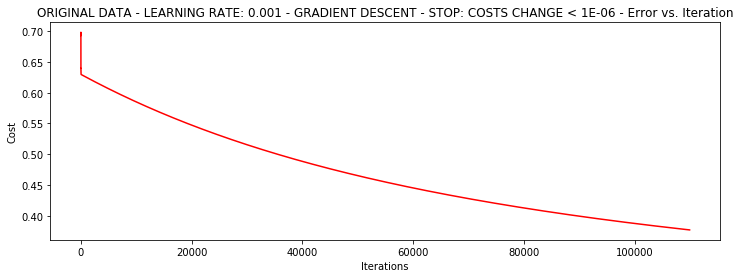

In [18]:
# Stop after stable small cost
# cost = 1E-6 need 110 000 times interation
runExpe(origin_data, theta, n, STOP_COST, thresh=0.000001, alpha=0.001)

***Original data - learning rate: 0.001 - Gradient descent - Stop: gradient norm < 0.05
Theta: [[-2.37033409  0.02721692  0.01899456]] - Iter: 40045 - Last cost: 0.49 - Duration: 7.87s


array([[-2.37033409,  0.02721692,  0.01899456]])

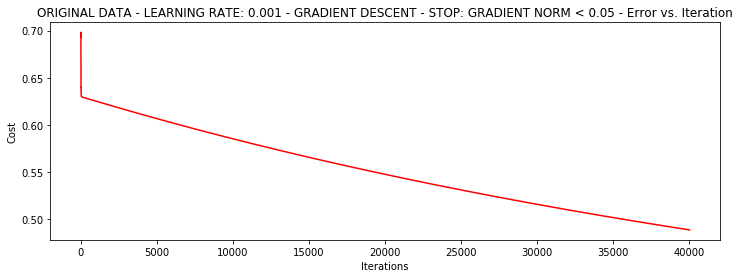

In [19]:
# Stop after stable gradient changes
# threshold = 0.05, need about 40 000 times interation
runExpe(origin_data, theta, n, STOP_GRAD, thresh=0.05, alpha=0.001)

### compare three different Gradient descent methods
- Batch gradient descent
- Stochastic gradient descent
- Mini-batch gradient descent

***Original data - learning rate: 0.001 - Stochastic descent - Stop: 5000 iterations
Theta: [[-0.38036515  0.03110615  0.05466083]] - Iter: 5000 - Last cost: 1.70 - Duration: 0.30s


array([[-0.38036515,  0.03110615,  0.05466083]])

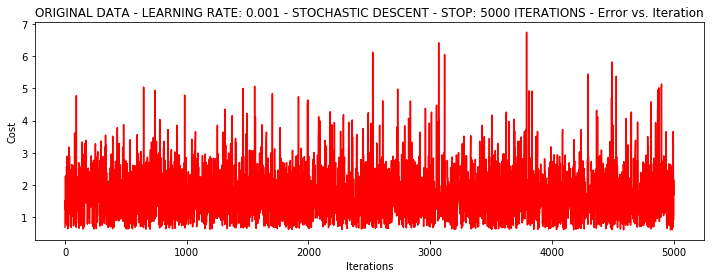

In [20]:
# Stochastic gradient descent
runExpe(origin_data, theta, 1, STOP_ITER, thresh=5000, alpha=0.001)

It's not stable, change learning rate(aplpha) = 0.000002

***Original data - learning rate: 2e-06 - Stochastic descent - Stop: 15000 iterations
Theta: [[-0.00202199  0.00997756  0.00089649]] - Iter: 15000 - Last cost: 0.63 - Duration: 0.91s


array([[-0.00202199,  0.00997756,  0.00089649]])

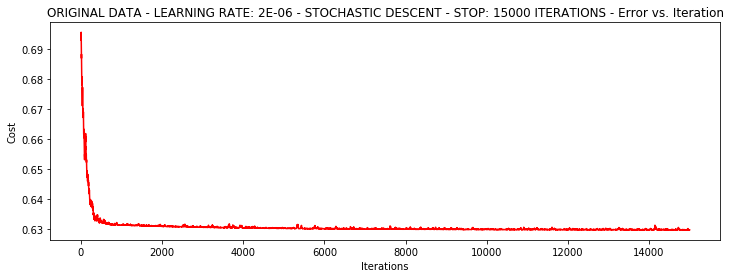

In [21]:
runExpe(origin_data, theta, 1, STOP_ITER, thresh=15000, alpha=0.000002)

Conclusion: speed, but need very small learning rate

***Original data - learning rate: 0.001 - Mini-batch (16) descent - Stop: 15000 iterations
Theta: [[-1.0391455   0.02026964  0.00310531]] - Iter: 15000 - Last cost: 0.57 - Duration: 1.16s


array([[-1.0391455 ,  0.02026964,  0.00310531]])

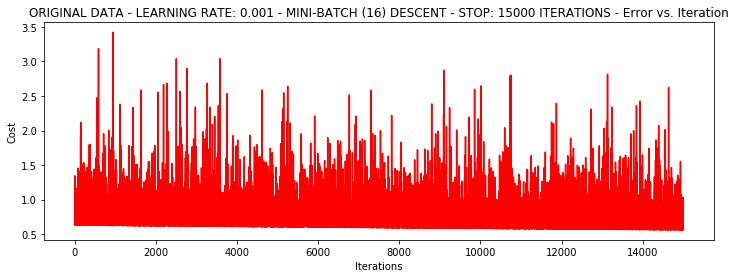

In [22]:
# Mini-batch descent
runExpe(origin_data, theta, 16, STOP_ITER, thresh=15000, alpha=0.001)

Normalized the data to stabilization.
$$g(x,X)={\frac  {x-\overline {X}}{variance}}$$

***Scaled data - learning rate: 0.001 - Gradient descent - Stop: 5000 iterations
Theta: [[0.3080807  0.86494967 0.77367651]] - Iter: 5000 - Last cost: 0.38 - Duration: 0.99s


array([[0.3080807 , 0.86494967, 0.77367651]])

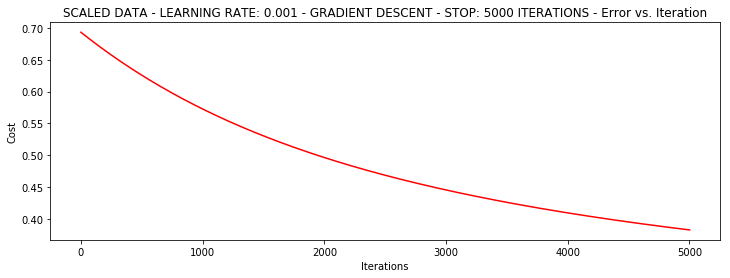

In [23]:
from sklearn import preprocessing as pp

scaled_data = origin_data.copy()
scaled_data[:, 1:3] = pp.scale(origin_data[:, 1:3])

runExpe(scaled_data, theta, n, STOP_ITER, thresh=5000, alpha=0.001)

***Scaled data - learning rate: 0.001 - Gradient descent - Stop: gradient norm < 0.02
Theta: [[1.0707921  2.63030842 2.41079787]] - Iter: 59422 - Last cost: 0.22 - Duration: 12.35s


array([[1.0707921 , 2.63030842, 2.41079787]])

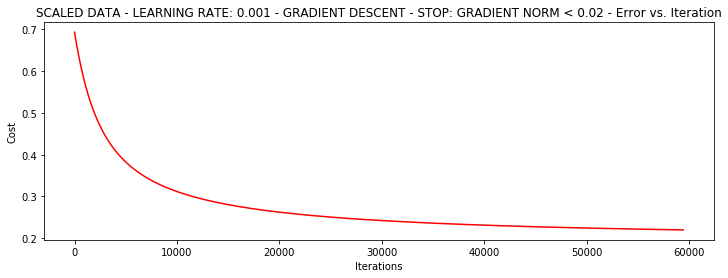

In [24]:
# thresh is the difference between two Gradient descent
runExpe(scaled_data, theta, n, STOP_GRAD, thresh=0.02, alpha=0.001)

***Scaled data - learning rate: 0.001 - Stochastic descent - Stop: gradient norm < 0.0004
Theta: [[1.14650498 2.7921959  2.56860522]] - Iter: 72655 - Last cost: 0.22 - Duration: 5.47s


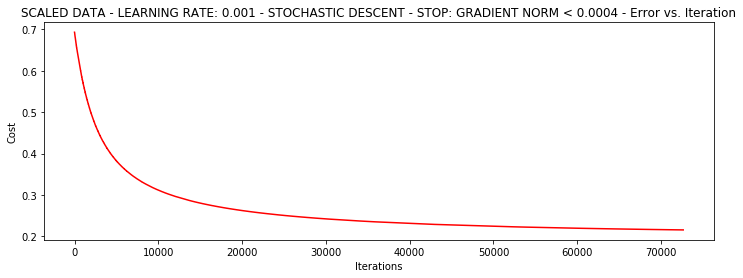

In [25]:
theta = runExpe(scaled_data, theta, 1, STOP_GRAD, thresh=0.002/5, alpha=0.001)

***Scaled data - learning rate: 0.001 - Mini-batch (16) descent - Stop: gradient norm < 0.004
Theta: [[1.16996828 2.84302362 2.61083031]] - Iter: 4458 - Last cost: 0.21 - Duration: 0.45s


array([[1.16996828, 2.84302362, 2.61083031]])

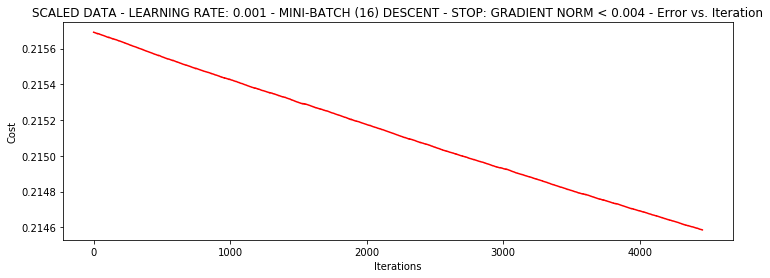

In [26]:
# Batch
runExpe(scaled_data, theta, 16, STOP_GRAD, thresh=0.002*2, alpha=0.001)

### Prediction

In [27]:
def predict(X, theta):
    return [1 if x >= 0.5 else 0 for x in model(X, theta)]


scaled_X = scaled_data[:, :3]
y = scaled_data[:, 3]
predictions = predict(scaled_X, theta)
correct = [
    1 if ((a == 1 and b == 1) or (a == 0 and b == 0)) else 0
    for (a, b) in zip(predictions, y)
]
accuracy = (sum(map(int, correct)) % len(correct))
print('accuracy = {0}%'.format(accuracy))

accuracy = 89%
